# PROYECTO 10 - TRIPLETEN

El proyecto se basará en la evaluación del estudio de mercado para un restaurante que tiene como diferenciación que los comensales serán atendidos por robots. El objetivo es analizar el estado actual del mercado y comprobar si se podría mantener el éxito en el competitivo mundo de los restaurantes ubicados en Los Ángeles.

## Descarga los datos

In [1]:
# Importación de librerías necesarias para trabajar:
import pandas as pd
import numpy as np 
import scipy as sp
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt
from scipy import stats
import plotly.express as px

#Descrpición de datos:

+ Tabla rest_data:
+ id — Identificación de restaurante única
+ object_name — Nombre del establecimiento
+ chain — Establecimiento que pertenece a una cadena (TRUE/FALSE)
+ object_type — Tipo de establecimiento
+ address — Dirección
+ number — Número de asientos


In [2]:
#Lectura e información principal del DF data:

data = pd.read_csv('/datasets/rest_data_us_upd.csv')
print(data.head())
print("Cantidad de filas es: ", len(data))
print("La estructura del dataset es: ", data.shape)
print("Tipo de datos:")
data.dtypes
print()
print("Información estadística del dataset:")
data.info(memory_usage="deep")

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/rest_data_us_upd.csv'

El DF data contiene información acerca de los restaurantes en la zona de LA. Nos brinda datos de ubicación, nombre, si pertenece a una cadena , el tipo , y la cantidad de comensales que puede permitirse atender por número de sillas. 

### Prepáralos para el análisis

In [ ]:
# Recopilar información acerca de valores ausentes y/o nulos.
data.info()

print()

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


Se obtiene que la columna CHAIN tiene 3 valores ausentes.

In [ ]:
#Procedemos con la eliminación de los valores ausentes:
data = data.dropna()
data.info()
print()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


Se procede con la eliminación de esas tres filas ya que no representan un porcentaje que pueda afectar de manera concreta nuestro estudio de mercado frente a los restaurantes de la competencia. Adicional, se ha evaluado el tipo de variable que contiene cada una de las filas, se considera correcto para proceder.

In [ ]:
#Evaluación de valores duplicados:

print(data.duplicated().sum())

0


## Análisis de datos


### Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [ ]:
# Tipos de establecimientos:
data['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [ ]:
#Cantidad de filas:
total_objtype = data['object_type'].count()
total_objtype

9648

Calcular la proporción referente al total:

In [ ]:
obj_cafe  = (data['object_type'] == 'Cafe').sum()
prop_cafe = obj_cafe / total_objtype

In [ ]:
obj_rest  = (data['object_type'] == 'Restaurant').sum()
prop_rest = obj_rest / total_objtype

In [ ]:
obj_fastfood  = (data['object_type'] == 'Fast Food').sum()
prop_fastfood = obj_fastfood / total_objtype

In [ ]:
obj_bakery  = (data['object_type'] == 'Bakery').sum()
prop_bakery = obj_bakery / total_objtype

In [ ]:
obj_bar  = (data['object_type'] == 'Bar').sum()
prop_bar = obj_bar / total_objtype

In [ ]:
obj_pizza  = (data['object_type'] == 'Pizza').sum()
prop_pizza = obj_pizza / total_objtype

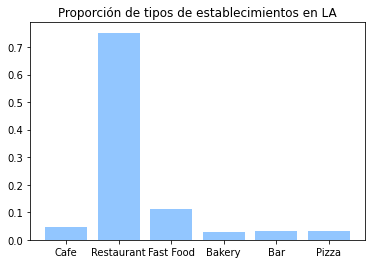

In [ ]:
#Gráfico:

keys = ['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza']
vals = [prop_cafe, prop_rest,prop_fastfood, prop_bakery, prop_bar, prop_pizza]

with plt.style.context('seaborn-pastel'):
    plt.bar(keys,vals)
    plt.title('Proporción de tipos de establecimientos en LA')
    plt.show()


Al analizar el gráfico se tiene que el tipo de establecimiento mayoritario en este territorio corresponde al Restaurant con más del 70%, en segundo lugar estaría Fast Food con a penas un poco más del 10%.

###  Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

In [ ]:
data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [ ]:
total_chain = data['chain'].count()
total_chain

9648

In [ ]:
chain_false = (data['chain'] == False).sum()
chain_false

5972

In [ ]:
prop_false = chain_false / total_chain
prop_false

0.6189883913764511

In [ ]:
chain_true = (data['chain'] == True).sum()
chain_true

3676

In [ ]:
prop_true = chain_true / total_chain
prop_true

0.38101160862354894

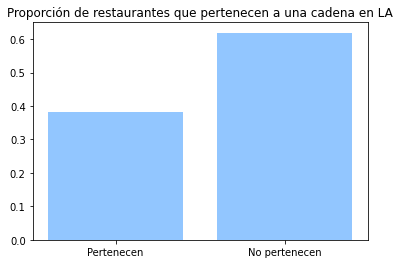

In [ ]:
#Gráfico:

keys = ['Pertenecen' , 'No pertenecen']
vals = [prop_true , prop_false]

with plt.style.context('seaborn-pastel'):
    plt.bar(keys,vals)
    plt.title('Proporción de restaurantes que pertenecen a una cadena en LA')
    plt.show()

Según el gráfico tenemos que la mayoría de restaurantes indpendientemente del tipo por evaluar, no pertenecen a una cadena, es decir, son originales/propios. Con este dato podemos revisar que la competencia más fuerte proviene de emprendedores.

### ¿Qué tipo de establecimiento es habitualmente una cadena?

In [ ]:
true_chain = (data[data['chain'] == True])
true_chain

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [ ]:
count_type = true_chain['object_type'].value_counts().to_frame()
count_type

,object_type
Restaurant,2292
Fast Food,605
Bakery,283
Cafe,266
Pizza,153
Bar,77


<AxesSubplot:title={'center':'Cantidad de restaurantes que pertenecen a cadenas en LA'}>

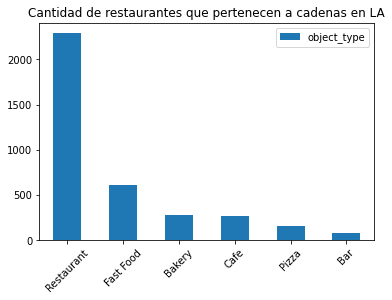

In [ ]:
# Gráfico:

count_type.plot(kind='bar', title= 'Cantidad de restaurantes que pertenecen a cadenas en LA', rot = 45)

Por orden ,se puede observar que nuevamente, los que son tipo restaurante en su mayoría son los que pertenecen a una cadena de negocio.

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [ ]:
true_chain

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [ ]:
print(data['number'].min())
print(data['number'].max())

1
229


In [ ]:
data['number'].describe()

count    9648.000000
mean       43.703566
std        47.627252
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

In [ ]:
group_1 = (data['number'] <= 50).sum()
group_1

7659

In [ ]:
group_2 = (data['number'] >= 51).sum()
group_2

1989

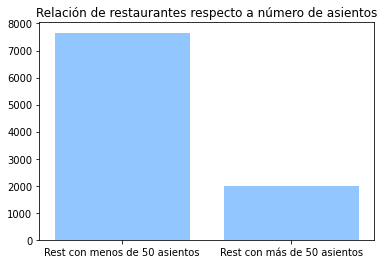

In [ ]:
#Gráfico:

keys = ['Rest con menos de 50 asientos' , 'Rest con más de 50 asientos']
vals = [group_1 , group_2]

with plt.style.context('seaborn-pastel'):
    plt.bar(keys,vals)
    plt.title('Relación de restaurantes respecto a número de asientos')
    plt.show()

Lo que caracteriza a las cadenas por lo que hemos obtenido es que en su mayoría hay muchos establecimientos con pocos asientos.



A continuación, vamos a encontrar por grupo de 25, qué tantos restaurantes participan de esa distribución:

In [ ]:
group_25 = (data['number'] <= 25).sum()
group_25

4629

In [ ]:
group_50 = ((data['number'] >= 26) & (data['number'] <= 50)).sum()
group_50

3030

In [ ]:
group_75 = ((data['number'] >= 51) & (data['number'] <= 75)).sum()
group_75

257

In [ ]:
group_100 = ((data['number'] >= 76) & (data['number'] <= 100)).sum()
group_100

406

In [ ]:
group_125 = ((data['number'] >= 101) & (data['number'] <= 125)).sum()
group_125

455

In [ ]:
group_150 = ((data['number'] >= 126) & (data['number'] <= 150)).sum()
group_150

404

In [ ]:
group_175 = ((data['number'] >= 151) & (data['number'] <= 175)).sum()
group_175

151

In [ ]:
group_200 = ((data['number'] >= 176) & (data['number'] <= 200)).sum()
group_200

146

In [ ]:
group_229 = ((data['number'] >= 201) & (data['number'] <= 230)).sum()
group_229

170

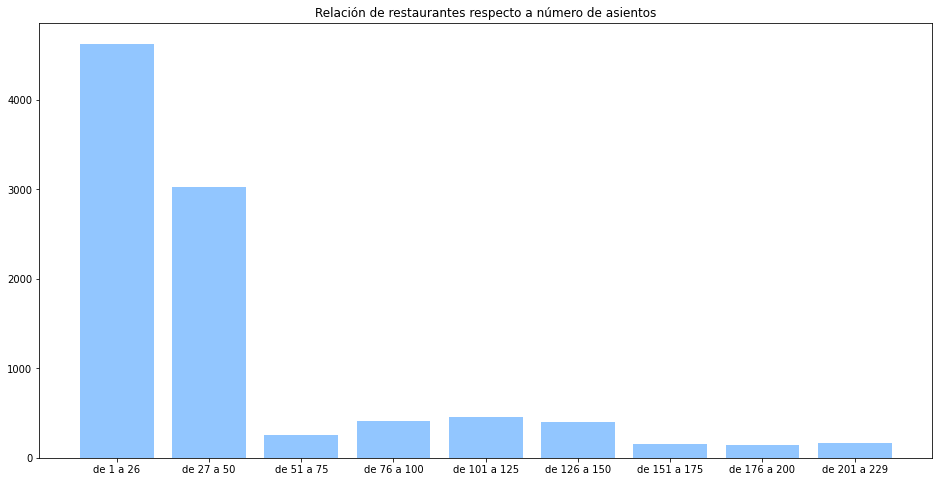

In [ ]:
#Gráfico:

keys = ['de 1 a 26', 'de 27 a 50', 'de 51 a 75','de 76 a 100', 'de 101 a 125', 'de 126 a 150', 'de 151 a 175', 'de 176 a 200', 'de 201 a 229']
vals = [group_25 , group_50, group_75, group_100, group_125, group_150, group_175, group_200, group_229]

with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(16, 8)) 
    plt.bar(keys,vals)
    plt.title('Relación de restaurantes respecto a número de asientos')
    plt.show()

En conclusión, para esta pregunta, se puede observar que las agrupaciones agregando asientos de 25 en 25, nos brinda que la respuesta se mantiene. La mayoría de establecimientos que pertencen a una cadena presentan menor cantidad de asientos

### Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [ ]:
prom_type = data[['object_type', 'number']]
prom_type

,object_type,number
0,Cafe,26
1,Restaurant,9
2,Fast Food,20
3,Restaurant,22
4,Restaurant,20
...,...,...
9646,Restaurant,122
9647,Restaurant,93
9648,Fast Food,15
9649,Cafe,6


In [ ]:
graph_prom_type = prom_type.groupby('object_type').agg({'number':'mean'}).sort_values(by='number').round()
graph_prom_type

,number
object_type,
Bakery,22.0
Cafe,25.0
Pizza,29.0
Fast Food,32.0
Bar,45.0
Restaurant,48.0


In [ ]:
# Gráfico:
import plotly.graph_objects as go
from plotly import graph_objects as go

graph_prom_type = dict( 
    promedio_asientos = [22, 25, 29, 32, 45 , 48] ,
    tipo_restaurante = ['Bakery', 'Cafe', 'Pizza', 'Fast Food', 'Bar', 'Restaurant'])

fig = px.funnel(graph_prom_type, x='promedio_asientos', y='tipo_restaurante',
                title='Promedio de número de asientos por tipo de restaurante')

fig.show()


### Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [ ]:
data['address'] = data['address'].astype(str)
data['address'] = data['address'].str.upper()

In [ ]:
data['name_street'] = data['address'].str.extract(r'\d{2,5}(.*)', expand=False).str.strip()
#ata['name_street'] = data['address'].str.extract(r'\d{2,4}(\d\w\s)\d{1,4}', expand=False).str.strip()

data.head(10)


# ARREGLAR ESTO

,id,object_name,address,chain,object_type,number,name_street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100,WORLD WAY 126
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,W 6TH ST STE 226
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,N SAN FERNANDO RD UNIT 103
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,N CAHUENGA BLVD


### Traza un gráfico de las diez mejores calles por número de restaurantes.

In [ ]:
best_streets = (data.groupby('name_street').agg({'object_name':'count'})).sort_values(by='object_name',ascending=False)

best_streets.head(10)

,object_name
name_street,
W SUNSET BLVD,297
W PICO BLVD,289
HOLLYWOOD BLVD,168
WILSHIRE BLVD,161
S VERMONT AVE,148
SANTA MONICA BLVD,146
W 3RD ST,145
BEVERLY BLVD,135
S FIGUEROA ST,134


In [ ]:
best_streets_10 = best_streets.head(10)

<AxesSubplot:title={'center':'Las 10 mejores calles por número de restaurantes'}, xlabel='name_street'>

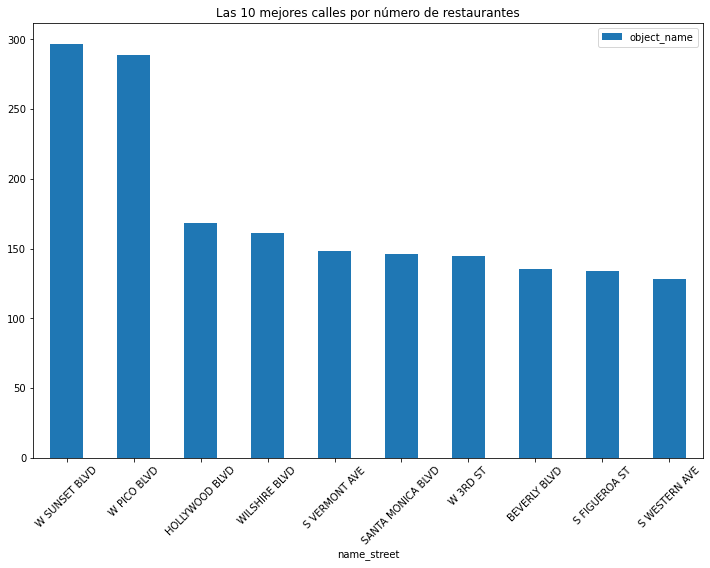

In [ ]:
best_streets_10.plot(kind='bar', title= 'Las 10 mejores calles por número de restaurantes', rot = 45,figsize=[12,8])

### Encuentra el número de calles que solo tienen un restaurante.

In [ ]:
best_streets_min = (best_streets['object_name'] <= 1).sum()
best_streets_min


2433

Con esta información obtenemos que hay 2433 calles que presentan solo un restaurante en la misma.

In [ ]:
best_streets_max = (best_streets['object_name'] > 1).sum()
best_streets_max

628

La diferencia, 628 calles tienen más de un restaurante en la misma

###  Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [ ]:
distribucion = data.drop(['id','address','chain','object_type'] ,axis =1)
distribucion

,object_name,number,name_street
0,HABITAT COFFEE SHOP,26,N EAGLE ROCK BLVD
1,REILLY'S,9,WORLD WAY 120
2,STREET CHURROS,20,HOLLYWOOD BLVD 253
3,TRINITI ECHO PARK,22,W SUNSET BLVD
4,POLLEN,20,ECHO PARK AVE
...,...,...,...
9646,HALL OF JUSTICE,122,W TEMPLE AVE
9647,FIN-MELROSE,93,MELROSE AVE
9648,JUICY WINGZ,15,HOLLYWOOD BLVD
9649,MEDIDATE COFFEE,6,S SPRING ST STE 100


In [ ]:
df_asientos = (distribucion.groupby(['name_street']).agg({'object_name':'count', 'number':'mean'})).sort_values(by='object_name',ascending=False)
df_asientos['number'] = df_asientos['number'].round(0)
df_asientos = df_asientos.reset_index()

more_50 = df_asientos['object_name'] > 50 

df_asientos_50 = df_asientos[more_50]
df_asientos_50.head()

,name_street,object_name,number
0,W SUNSET BLVD,297,51.0
1,W PICO BLVD,289,41.0
2,HOLLYWOOD BLVD,168,53.0
3,WILSHIRE BLVD,161,62.0
4,S VERMONT AVE,148,46.0


In [ ]:
df_asientos_50['number'] = df_asientos_50['number'].astype(str).astype(float)
df_asientos_50['number'] = df_asientos_50['number'].astype(float).astype(int)

/tmp/ipykernel_50/2079623171.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_50/2079623171.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_asientos_50 = df_asientos_50.sort_values(by='number')

In [ ]:
# Generar listas para los gráficos:
number      = df_asientos_50['number']
number      = number.tolist()
name_street = df_asientos_50['name_street']
name_street = name_street.tolist()

<AxesSubplot:title={'center':'Relación entre la cantidad de asientos y las calles con muchos restaurantes'}, xlabel='name_street'>

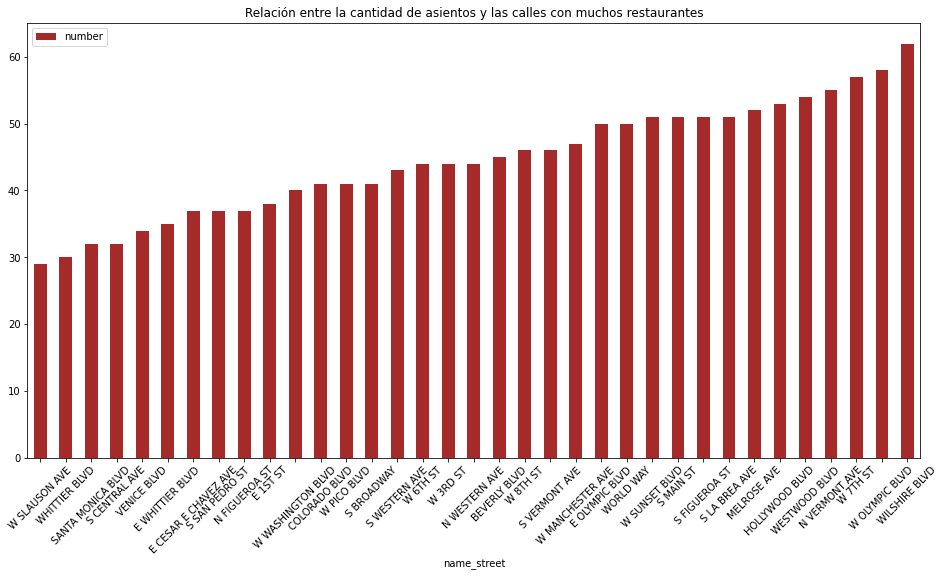

In [ ]:
df_asientos_50.plot(kind='bar', rot = 45,figsize=[16,8] , x='name_street',y ='number' , color = 'brown' ,
                   title = 'Relación entre la cantidad de asientos y las calles con muchos restaurantes')

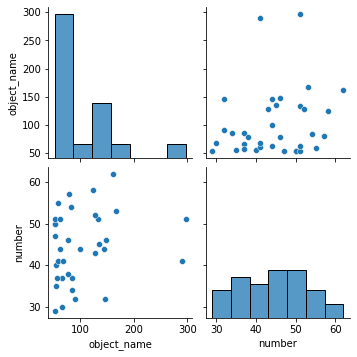

In [ ]:
sns.pairplot(df_asientos_50)

Esta distribución ordenada de menor a mayor, podemos observar que la tendencia o mayoría de calles presentan un alto número de asientos. Posiblemente estas calles son altamente transitadas y según histórico de consumo se podría revelar uinformación que los comensales prefieren comer y estar en el local en vez de otras alternativas.

Como conclusión de este proyecto, se puede decir que la atención realizada por los robots será diferenciada si pueden mantener y atender durante una jornada laboral constante a un alto número de asientos que es lo que existe actualmente en la zona estudiada de LA. Adicional, se puede observar que la tendencia de los restaurantes en las calles cuentan como obligatoriedad un alto nivel de asientos para atención al público en general por más que este represente aproximadamente el 21%.
Esta propuesta de local y atención podrá ser beneficiosa si el recorrido de los robots y su tiempo de atención es eficiente o similar al realizado por un humano, de esta manera se podría evaluar también el nivel de servicio y proponer una diferenciación aún más marcada frente a los competidores.
Se podría recomendar que el restaurante propuesto debe tener una mínima de 50 asientos que entraría entre los más destacados y en los que se encuentran en mas calles.
Para el desarrollo de una cadena, se debe comprender que la mayoría de la competencia es un Restaurante, por lo que la propuesta podría tomar ese camino para respetar la idea de negocio original, y vendría con soporte porque es la tendencia actual de las cadenas.

## PRESENTACIÓN:
    

Presentation: <https://jupyterhub.tripleten-services.com/user/user-3-1b6adfc1-84b4-4cb5-b39d-70f194c321a6/files/Proyecto%2010%20-%20TripleTen_presentacion.pdf>

<a id="some_id"></a>